In [5]:
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

# Analiza dynamiki fiksacji
## Analiza A - dynamika w funkcji wybranej odpowiedzi

In [6]:
Lmin = 10
Lmax = 118

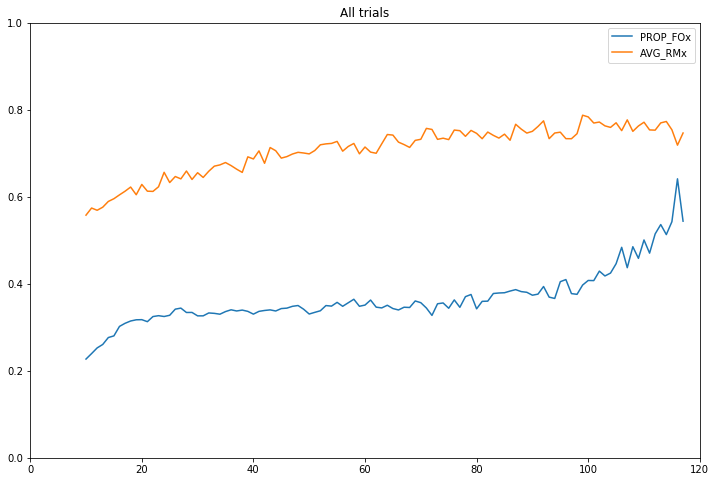

In [7]:
### Wszystkie triale
full = pd.read_csv(join('results', 'dynamics_full.csv'))
full[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'All trials',xlim=[0, 120], ylim=[0,1])

In [ ]:
corr = pd.read_csv(join('results', 'dynamics_corr.csv'))
corr[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Corr trials', xlim=[0, 120], ylim=[0,1])

In [ ]:
err = pd.read_csv(join('results', 'dynamics_err.csv'))
err[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Err trials', xlim=[0, 120], ylim=[0,1])

## Analiza B - czy czas rozwiązywania triala wpływa jakoś na dynamikę?

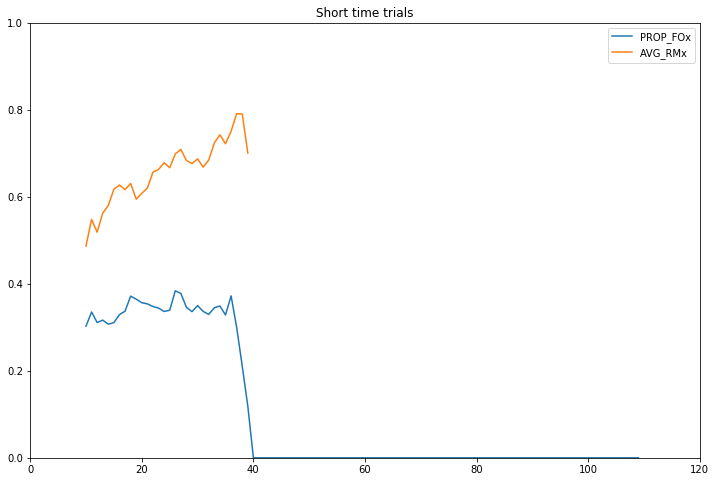

In [23]:
short_time = pd.read_csv(join('results', 'dynamics_time_short.csv'))
short_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Short time trials', xlim=[0, 120], ylim=[0,1])

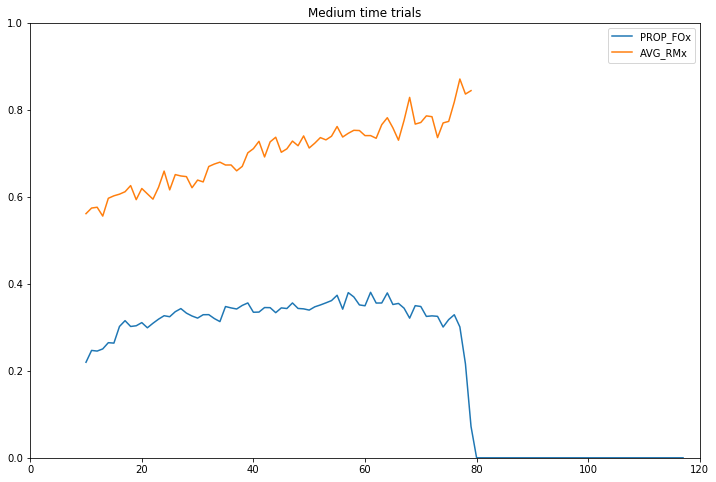

In [24]:
med_time = pd.read_csv(join('results', 'dynamics_time_med.csv'))
med_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium time trials', xlim=[0, 120], ylim=[0,1])

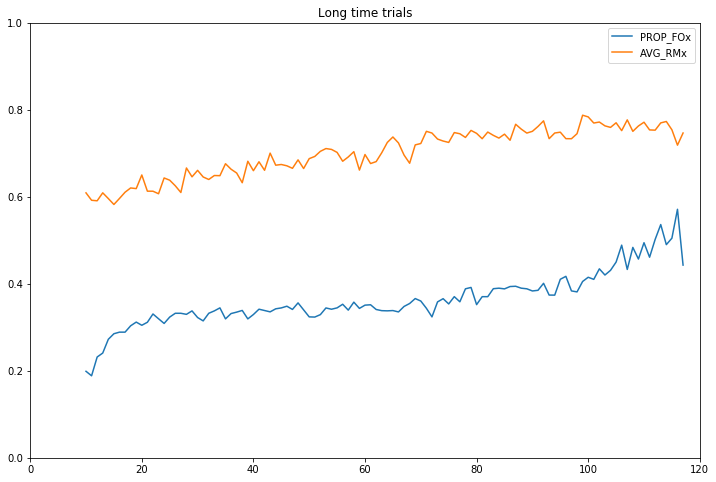

In [27]:
long_time = pd.read_csv(join('results', 'dynamics_time_long.csv'))
long_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Long time trials', xlim=[0, 120], ylim=[0,1])

## Analiza C - EASY, MEDIUM, HARD

In [ ]:
easy = pd.read_csv(join('results', 'dynamics_lev_easy.csv'))
easy[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Easy trials', xlim=[0, 120], ylim=[0,1])

In [ ]:
med_lev = pd.read_csv(join('results', 'dynamics_lev_med.csv'))
med_lev[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium trials', xlim=[0, 120], ylim=[0,1])

In [ ]:
hard_lev = pd.read_csv(join('results', 'dynamics_lev_hard.csv'))
hard_lev[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Hard trials', xlim=[0, 120], ylim=[0,1])

## Analiza D - dynamika w funkcji WMC (low, medium, high)